In [142]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [528]:
train_features = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
train_labels = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")
df = train_features.join(train_labels)

In [228]:
pd.Series(train_features.isnull().sum()*100/len(train_features)).sort_values(ascending=False).head(15)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
dtype: float64

In [225]:
print(f"Number of Respondents is {train_features.shape[0]}")

Number of Respondents is 26707


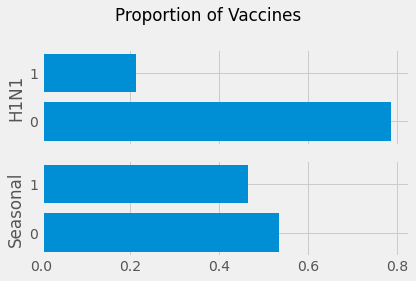

In [488]:
plt.style.use('fivethirtyeight')
n_obs = train_labels.shape[0]

fig, ax = plt.subplots(2, 1, sharex=True)
x1 = train_labels["h1n1_vaccine"].value_counts().div(n_obs).index.tolist()
y1 = train_labels["h1n1_vaccine"].value_counts().div(n_obs).values.tolist()
ax[0].barh(x1, y1)
ax[0].set_yticks([0, 1])
ax[0].set_ylabel("H1N1")
 
x2 = train_labels["seasonal_vaccine"].value_counts().div(n_obs).index.tolist()
y2 = train_labels["seasonal_vaccine"].value_counts().div(n_obs).values.tolist()
ax[1].barh(x2, y2)
ax[1].set_yticks([0, 1])
ax[1].set_ylabel("Seasonal")

plt.suptitle('Proportion of Vaccines')
fig.tight_layout()


In [491]:
def plot(col, title, labels=None):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
    
    counts = df[["h1n1_vaccine", col]].groupby(["h1n1_vaccine", col]).size().unstack("h1n1_vaccine")
    group_counts = counts.sum(axis="columns")
    props = counts.div(group_counts, axis="index")
    x = props.index.tolist()
    y = list(props[0].values)
    z = list(props[1].values)

    ax[0].barh(x, y, label="No")
    ax[0].barh(x, z, left=y, label="Yes")
    ax[0].set_title("H1N1 Vaccine")
    ax[0].legend(loc="upper center")

    counts1 = df[["seasonal_vaccine", col]].groupby(["seasonal_vaccine", col]).size().unstack("seasonal_vaccine")
    group_counts1 = counts1.sum(axis="columns")
    props1 = counts1.div(group_counts1, axis="index")
    x1 = props1.index.tolist()
    y1 = list(props1[0].values)
    z1 = list(props1[1].values)

    ax[1].barh(x1, y1, label="No")
    ax[1].barh(x1, z1, left=y1, label="Yes")
    ax[1].set_title("Seasonal Vaccine")
    ax[1].legend(loc="upper center")
    
    plt.suptitle(title)
    plt.yticks(x, labels)
    plt.tight_layout()

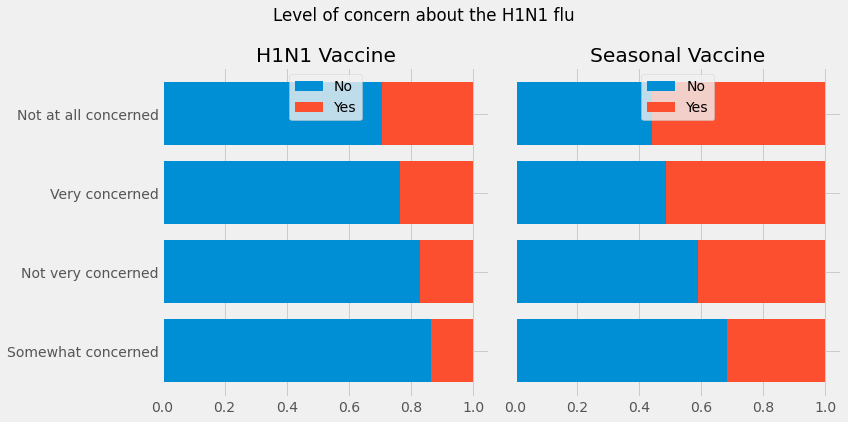

In [492]:
plot(col="h1n1_concern",
    labels=["Somewhat concerned", "Not very concerned", "Very concerned", "Not at all concerned"], 
    title="Level of concern about the H1N1 flu")

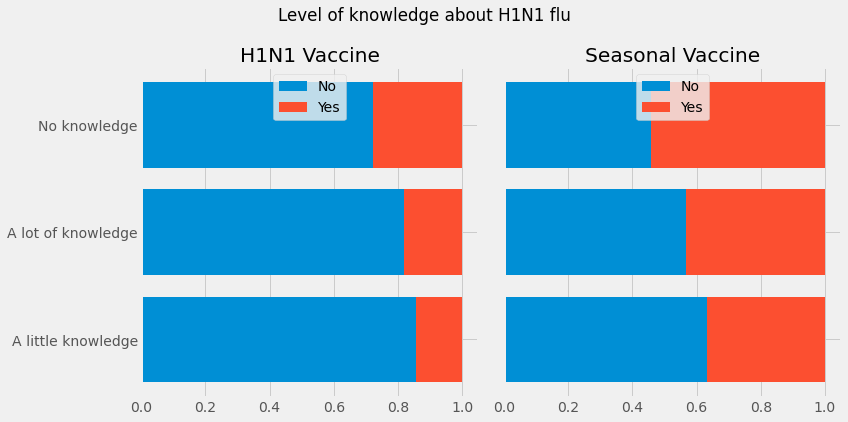

In [493]:
plot(col="h1n1_knowledge", 
    labels=["A little knowledge", "A lot of knowledge", "No knowledge"], 
    title="Level of knowledge about H1N1 flu")

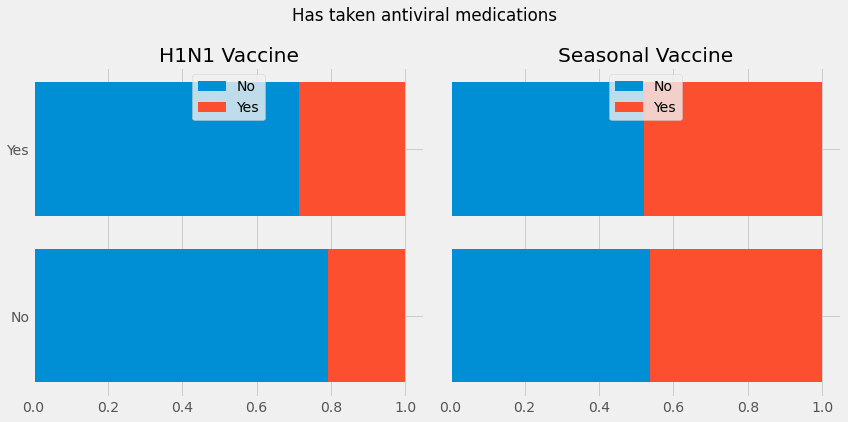

In [494]:
plot(col="behavioral_antiviral_meds", 
    labels=["No", "Yes"], 
    title="Has taken antiviral medications")

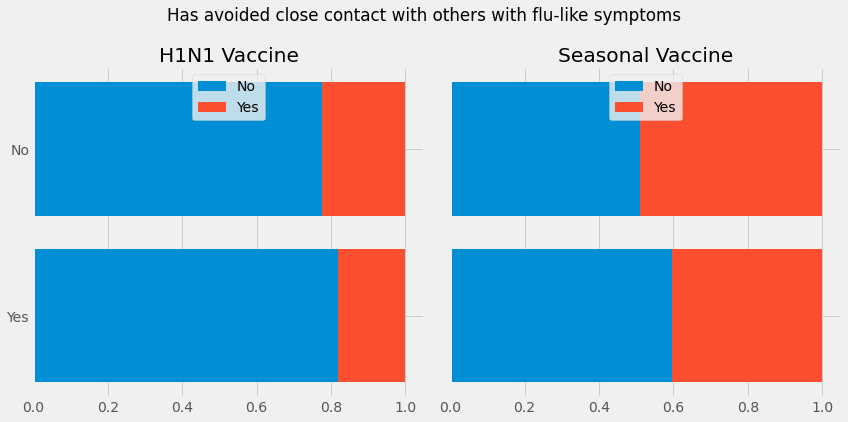

In [495]:
plot(col="behavioral_avoidance", 
    labels=["Yes", "No"], 
    title="Has avoided close contact with others with flu-like symptoms")

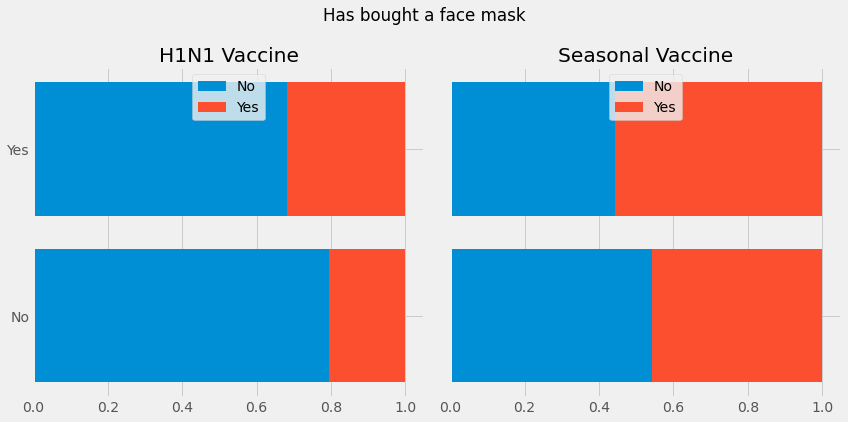

In [496]:
plot(col="behavioral_face_mask", 
    labels=["No", "Yes"], 
    title="Has bought a face mask")

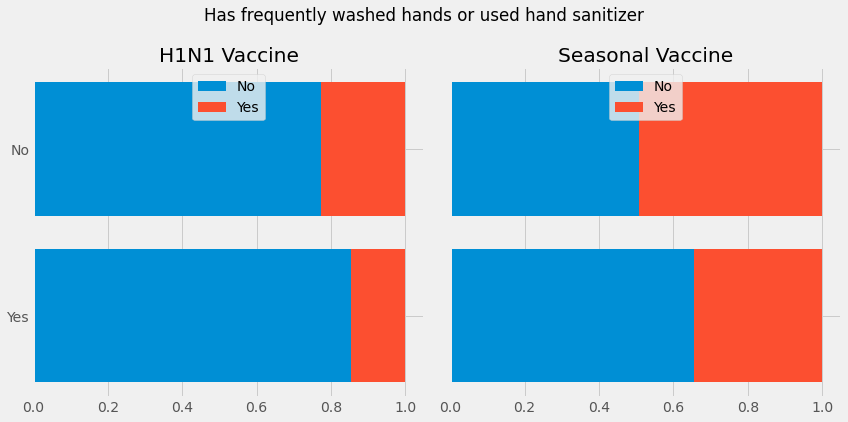

In [497]:
plot(col="behavioral_wash_hands", 
    labels=["Yes", "No"], 
    title="Has frequently washed hands or used hand sanitizer")

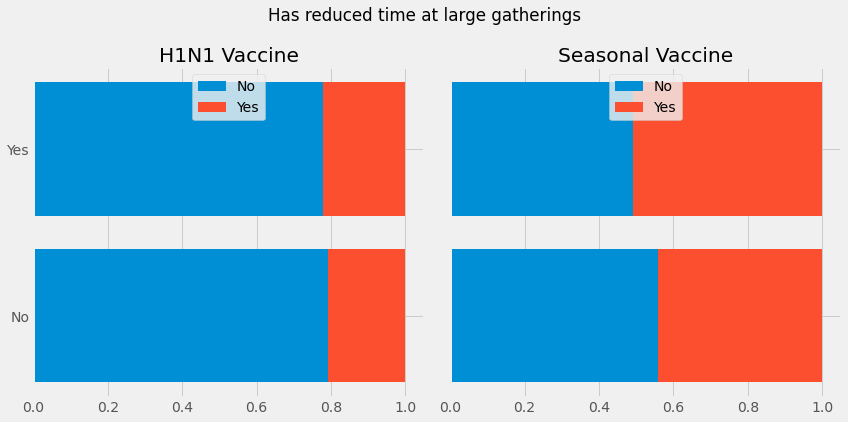

In [498]:
plot(col="behavioral_large_gatherings", 
    labels=["No", "Yes"], 
    title="Has reduced time at large gatherings")

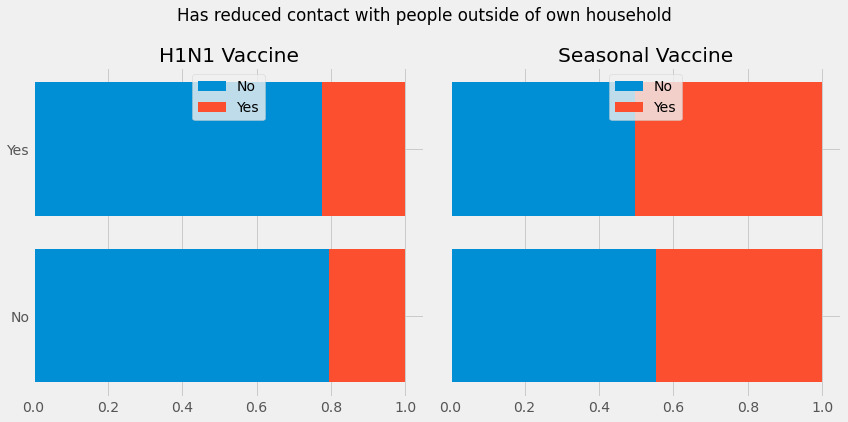

In [499]:
plot(col="behavioral_outside_home", 
    labels=["No", "Yes"], 
    title="Has reduced contact with people outside of own household")

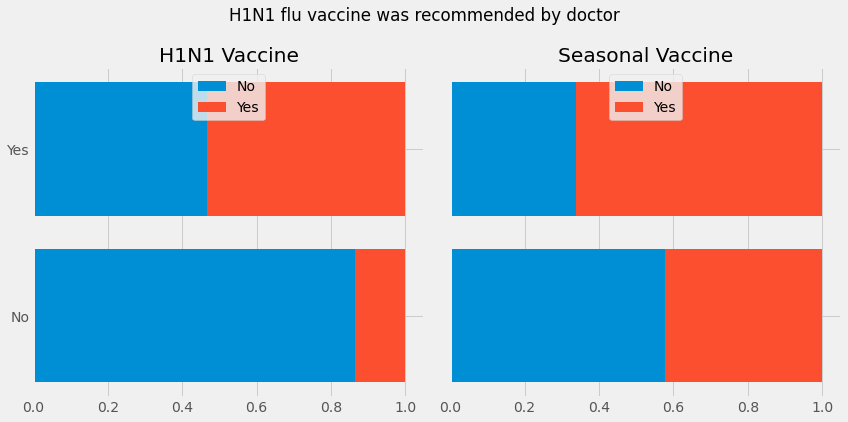

In [500]:
plot(col="doctor_recc_h1n1", 
    labels=["No", "Yes"], 
    title="H1N1 flu vaccine was recommended by doctor")

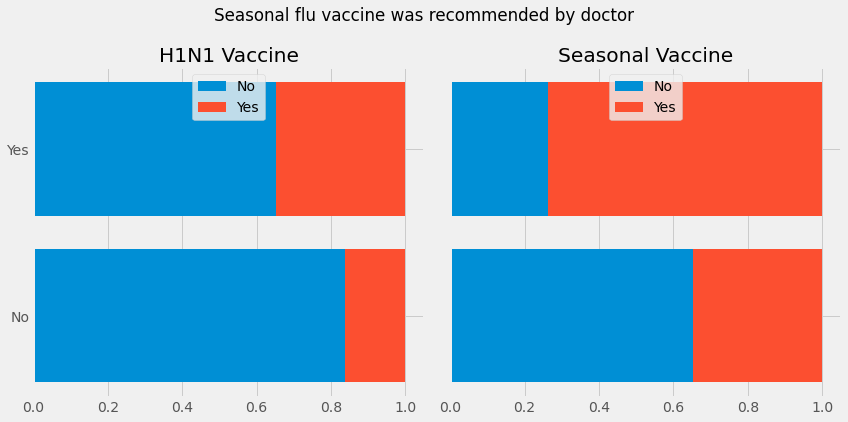

In [501]:
plot(col="doctor_recc_seasonal", 
    labels=["No", "Yes"], 
    title="Seasonal flu vaccine was recommended by doctor")

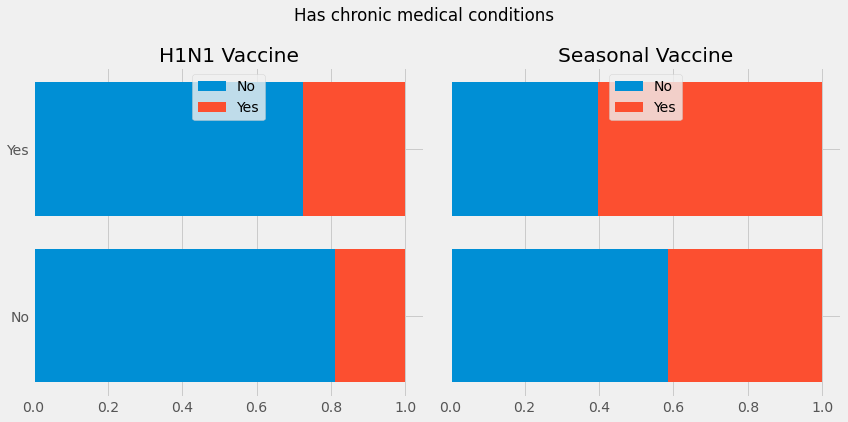

In [502]:
plot(col="chronic_med_condition", 
    labels=["No", "Yes"], 
    title="Has chronic medical conditions")

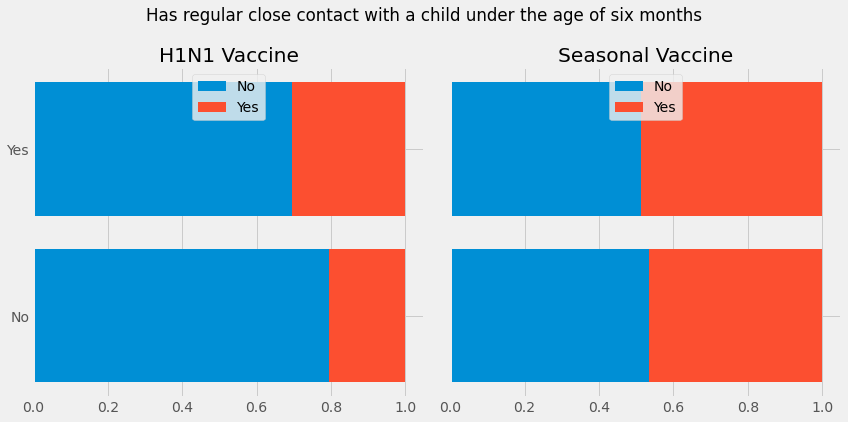

In [503]:
plot(col="child_under_6_months", 
    labels=["No", "Yes"], 
    title="Has regular close contact with a child under the age of six months")

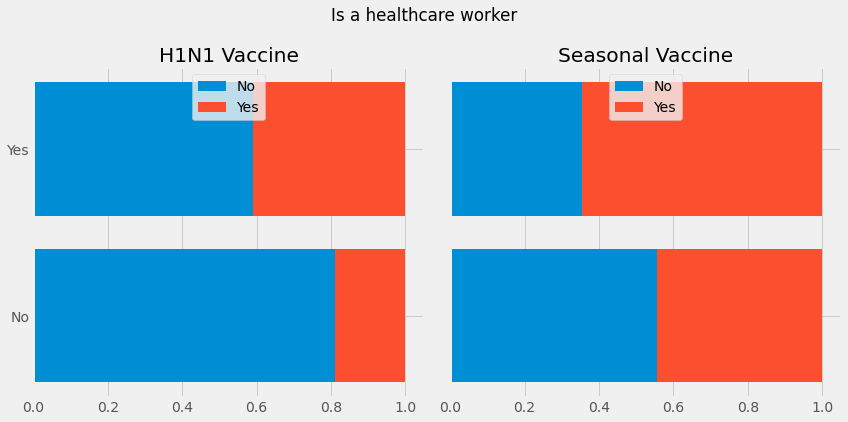

In [504]:
plot(col="health_worker", 
    labels=["No", "Yes"], 
    title="Is a healthcare worker")

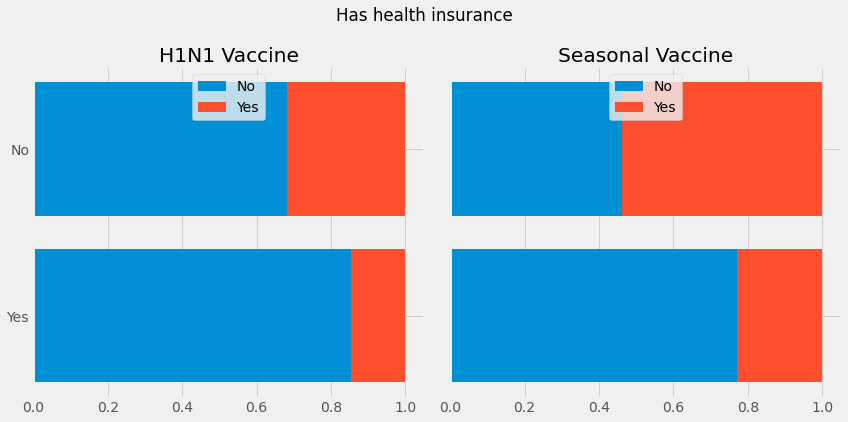

In [505]:
plot(col="health_insurance", 
    labels=["Yes", "No"], 
    title="Has health insurance")

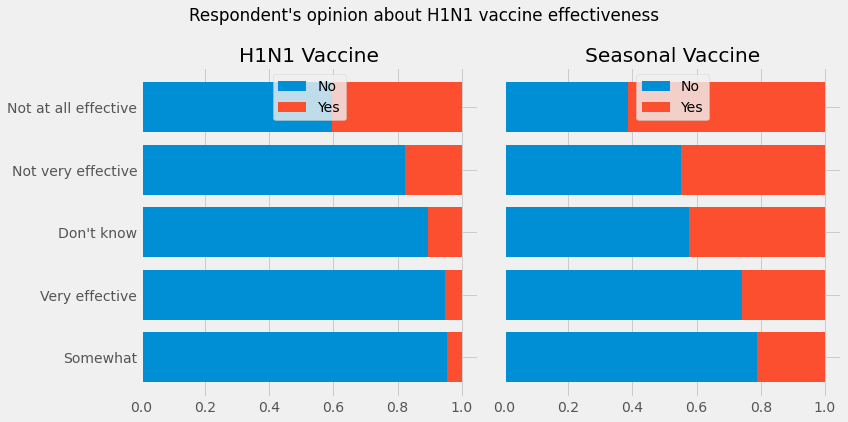

In [506]:
plot(col="opinion_h1n1_vacc_effective", 
    labels=["Somewhat", "Very effective", "Don't know", "Not very effective", "Not at all effective"], 
    title="Respondent's opinion about H1N1 vaccine effectiveness")

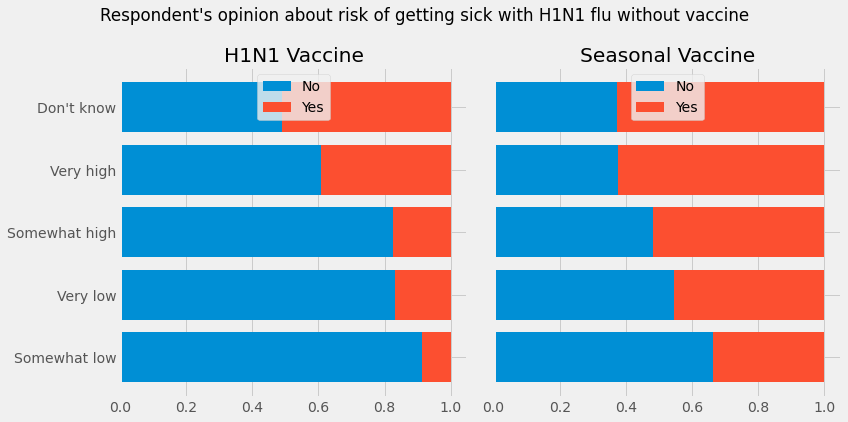

In [507]:
plot(col="opinion_h1n1_risk", 
    labels=["Somewhat low", "Very low", "Somewhat high", "Very high", "Don't know"], 
    title="Respondent's opinion about risk of getting sick with H1N1 flu without vaccine")

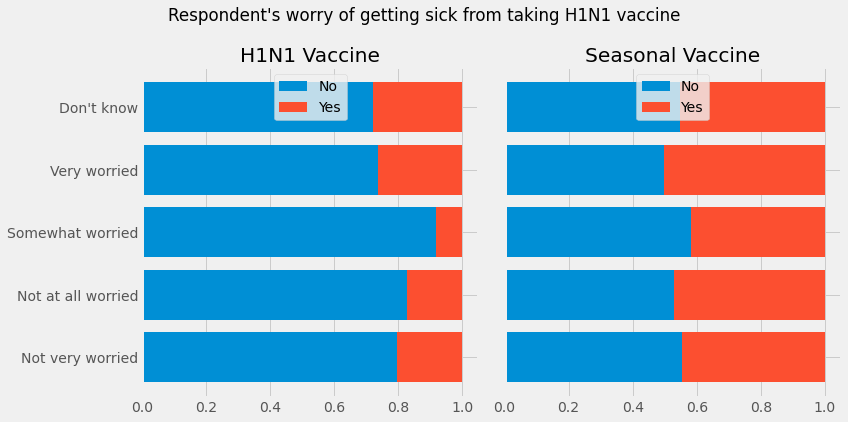

In [508]:
plot(col="opinion_h1n1_sick_from_vacc", 
    labels=["Not very worried", "Not at all worried", "Somewhat worried", "Very worried", "Don't know"], 
    title="Respondent's worry of getting sick from taking H1N1 vaccine")

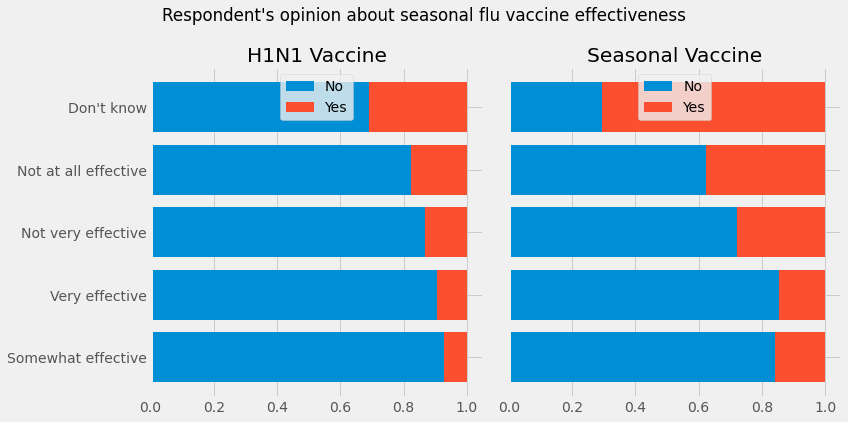

In [509]:
plot(col="opinion_seas_vacc_effective", 
    labels=["Somewhat effective", "Very effective", "Not very effective", "Not at all effective", "Don't know"], 
    title="Respondent's opinion about seasonal flu vaccine effectiveness")

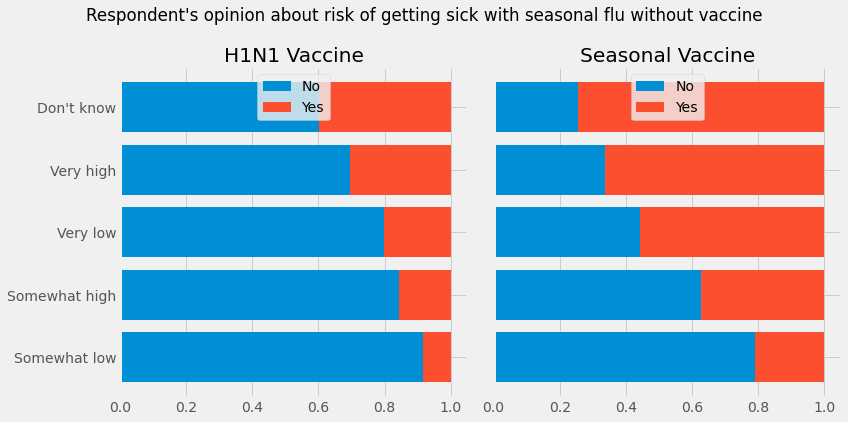

In [510]:
plot(col="opinion_seas_risk", 
    labels=["Somewhat low", "Somewhat high", "Very low", "Very high", "Don't know"], 
    title="Respondent's opinion about risk of getting sick with seasonal flu without vaccine")

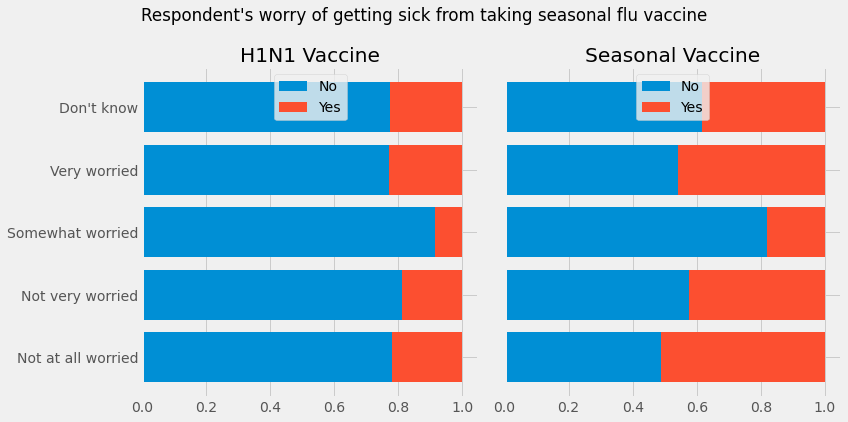

In [511]:
plot(col="opinion_seas_sick_from_vacc", 
    labels=["Not at all worried", "Not very worried", "Somewhat worried", "Very worried", "Don't know"], 
    title="Respondent's worry of getting sick from taking seasonal flu vaccine")

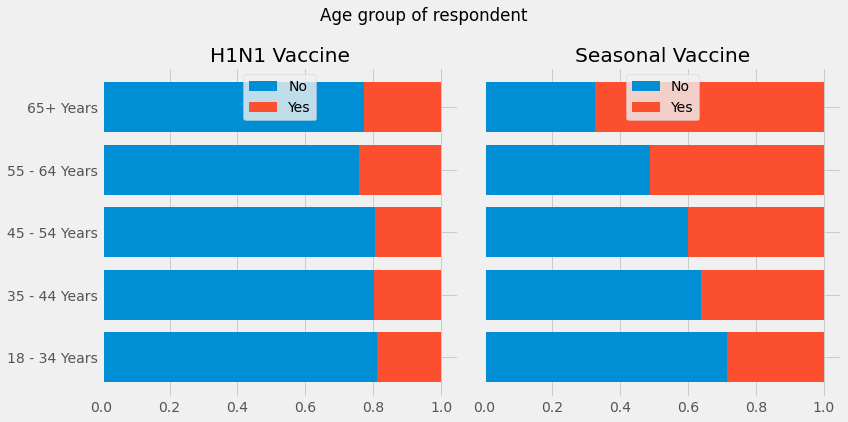

In [513]:
plot(col="age_group", title="Age group of respondent")

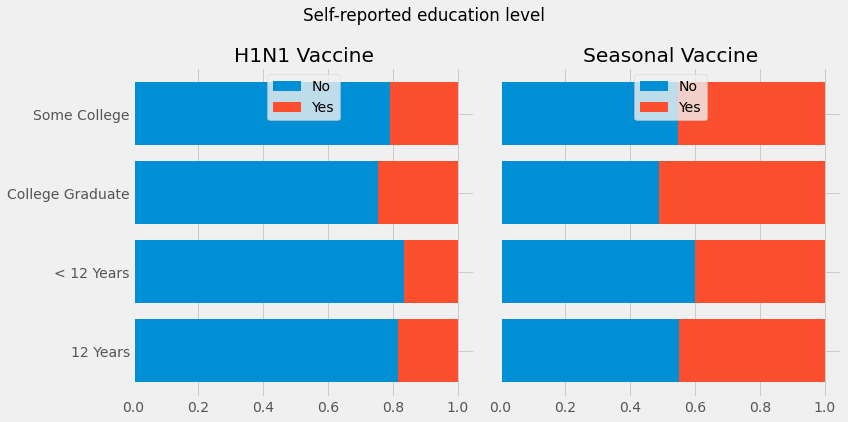

In [514]:
plot(col="education", title="Self-reported education level")

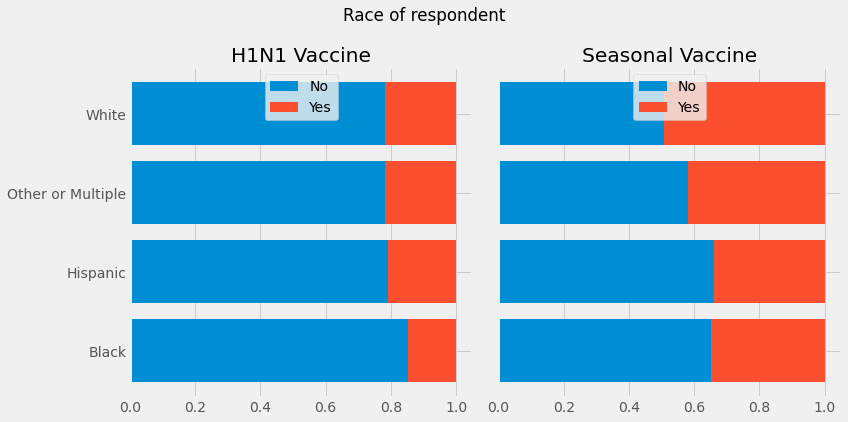

In [515]:
plot(col="race", title="Race of respondent")

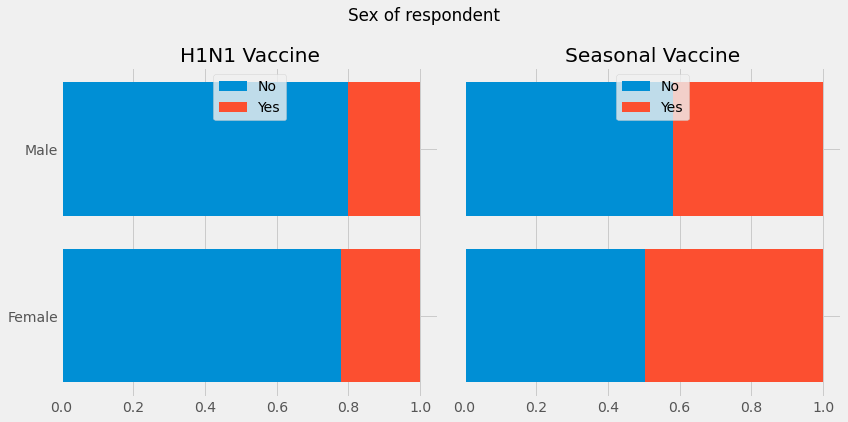

In [516]:
plot(col="sex", title="Sex of respondent")

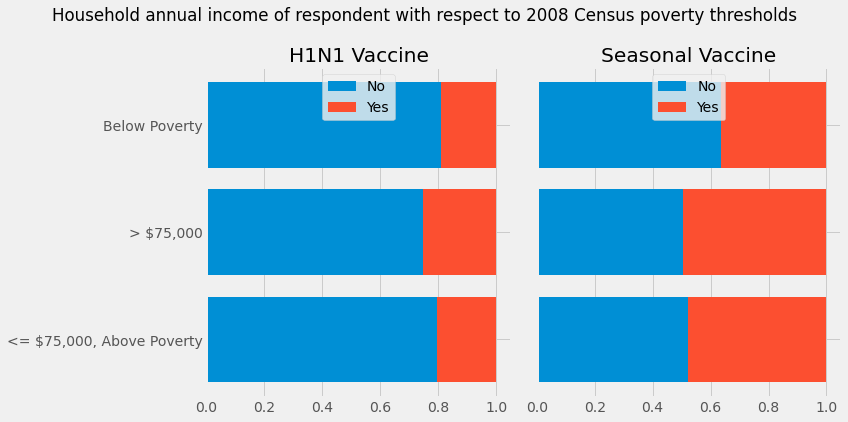

In [517]:
plot(col="income_poverty", title="Household annual income of respondent with respect to 2008 Census poverty thresholds")

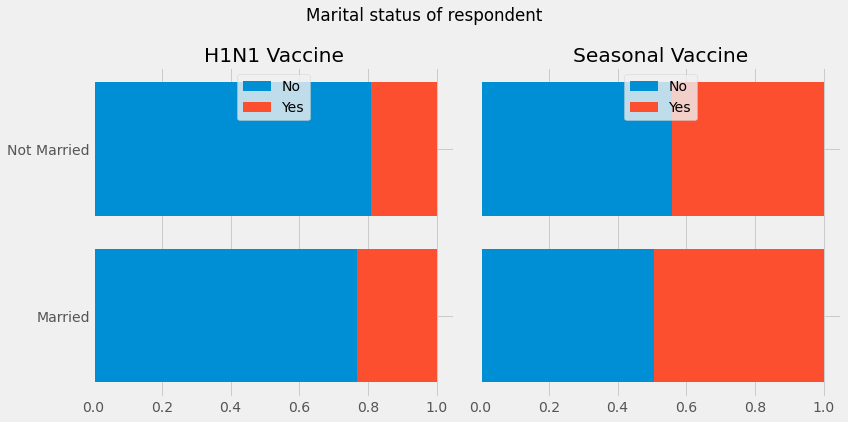

In [518]:
plot(col="marital_status", title="Marital status of respondent")

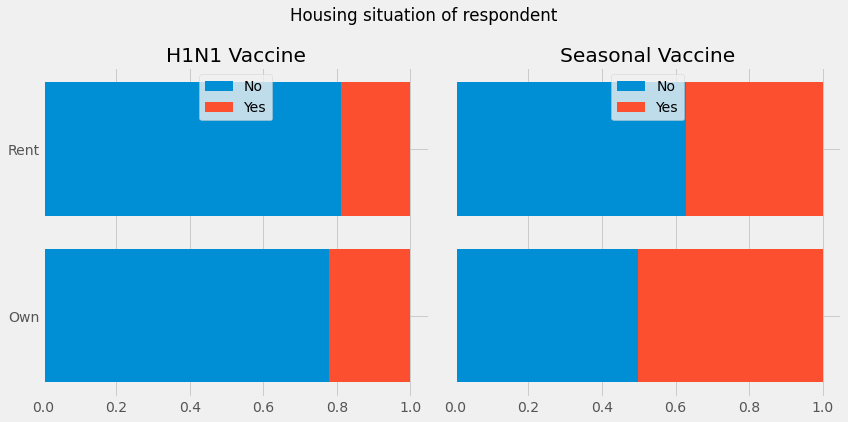

In [519]:
plot(col="rent_or_own", title="Housing situation of respondent")

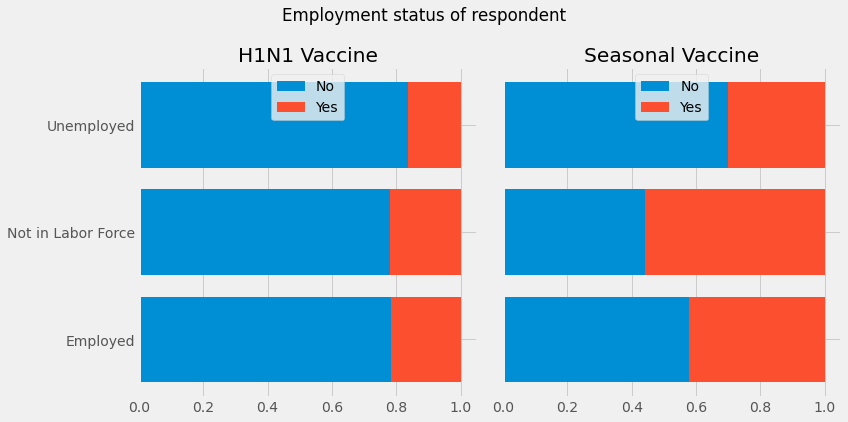

In [520]:
plot(col="employment_status", title="Employment status of respondent")

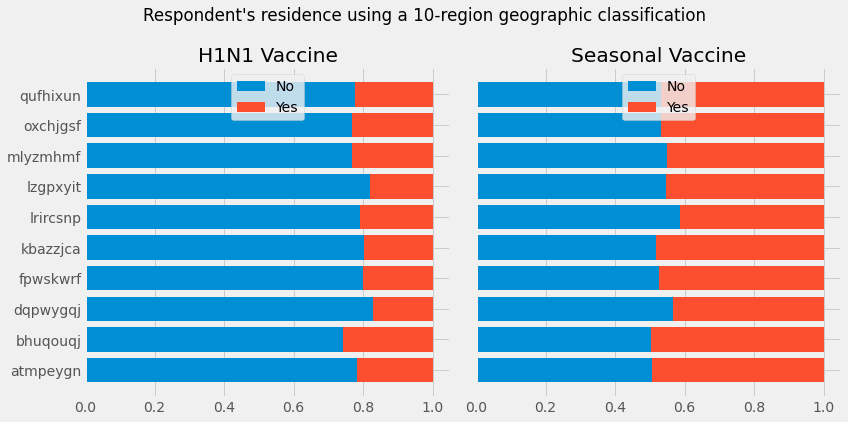

In [521]:
plot(col="hhs_geo_region", title="Respondent's residence using a 10-region geographic classification")

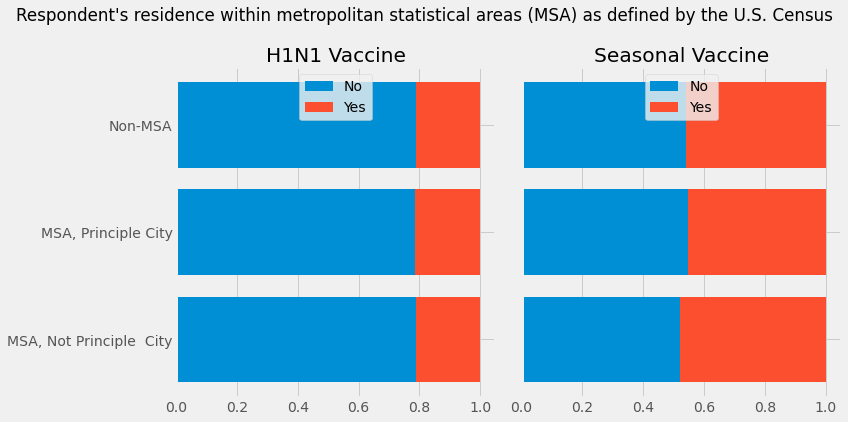

In [522]:
plot(col="census_msa", title="Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census")

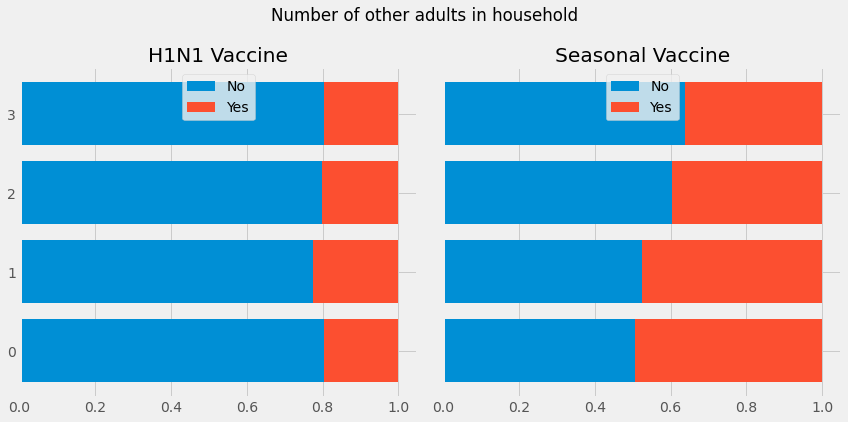

In [523]:
plot(col="household_adults", title="Number of other adults in household")

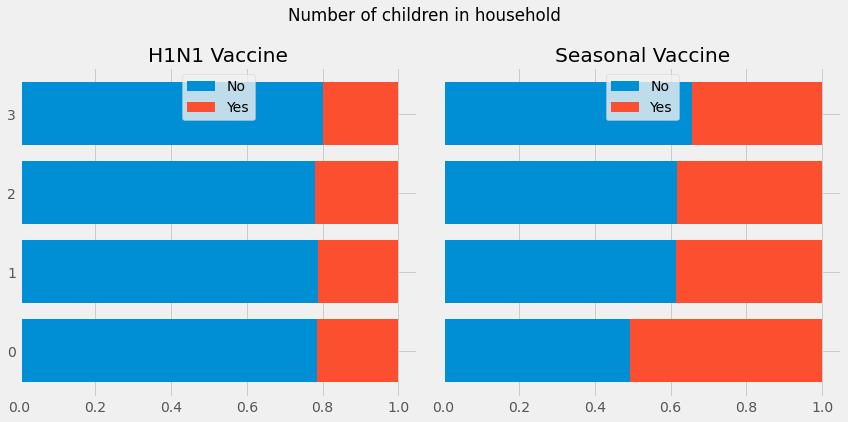

In [524]:
plot(col="household_children", title="Number of children in household")

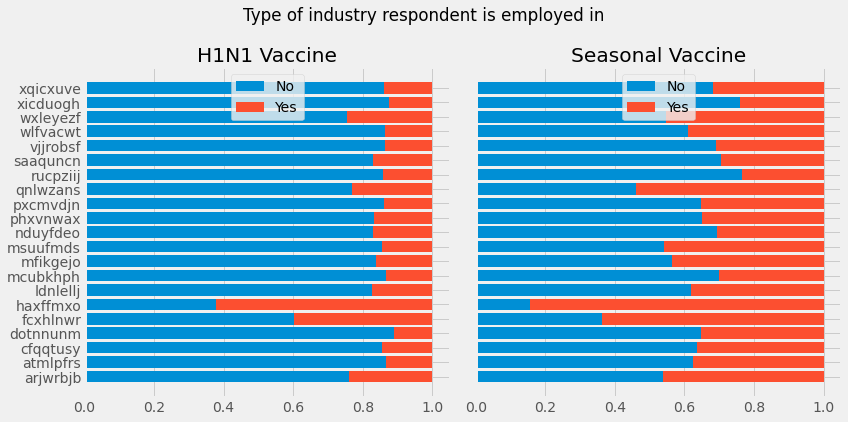

In [525]:
plot(col="employment_industry", title="Type of industry respondent is employed in")

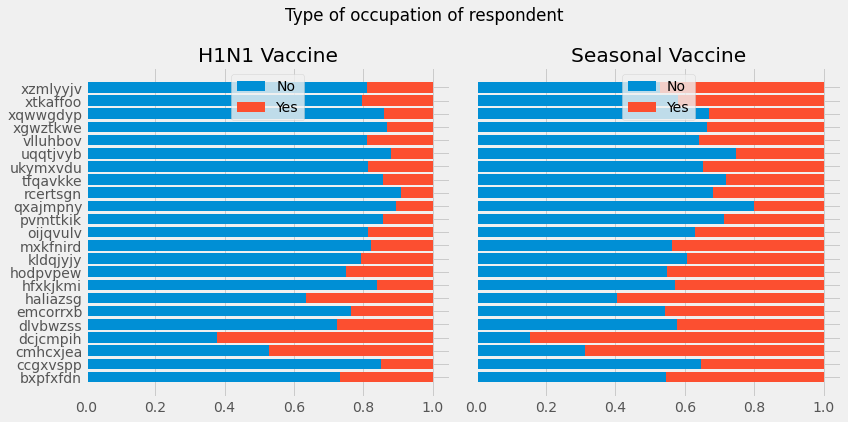

In [526]:
plot(col="employment_occupation", title="Type of occupation of respondent")

### Preparing the data

In [527]:
train_features.set_index("respondent_id", inplace=True)
train_labels.set_index("respondent_id", inplace=True)

KeyError: "None of ['respondent_id'] are in the columns"

In [136]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [112]:
num_attribs = list(train_set_features.select_dtypes(exclude=["object"]))
cat_attribs = list(train_set_features.select_dtypes(include=["object"]))

In [158]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    #("cat", cat_pipeline, cat_attribs),
])

In [160]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [161]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [162]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_set_features,
    train_set_labels,
    test_size=0.33,
    shuffle=True,
    stratify=train_set_labels,
    random_state=6
)

In [163]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                         

In [164]:
preds = full_pipeline.predict_proba(X_eval)

[array([[0.7089818 , 0.2910182 ],
        [0.9022322 , 0.0977678 ],
        [0.84459821, 0.15540179],
        ...,
        [0.92338647, 0.07661353],
        [0.89632722, 0.10367278],
        [0.92789026, 0.07210974]]),
 array([[0.52721929, 0.47278071],
        [0.61838433, 0.38161567],
        [0.37023814, 0.62976186],
        ...,
        [0.8593694 , 0.1406306 ],
        [0.77843148, 0.22156852],
        [0.15113998, 0.84886002]])]

### Evaluation

In [165]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color="grey", linestyle="--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

In [166]:
y_preds = pd.DataFrame({
    "h1n1_vaccine": preds[0][:, 1],
    "seasonal_vaccine": preds[1][:, 1]},
    index=y_eval.index)

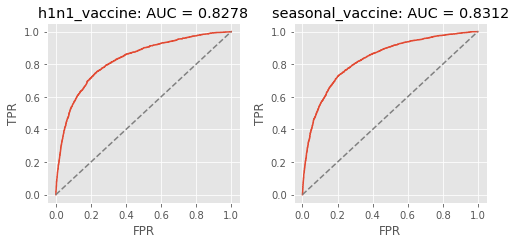

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(y_eval["h1n1_vaccine"], y_preds["h1n1_vaccine"], "h1n1_vaccine", ax=ax[0])
plot_roc(y_eval["seasonal_vaccine"], y_preds["seasonal_vaccine"], "seasonal_vaccine", ax=ax[1])

fig.tight_layout()